In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
new_df = pd.read_csv('penguins_preprocessed.csv')

In [3]:
new_df.drop('Unnamed: 0',axis = 1,inplace=True)

In [4]:
new_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender_male,average_sleep_duration
0,0.254545,0.666667,0.152542,0.291667,1,0.571429
1,0.269091,0.511905,0.237288,0.305556,0,1.000000
2,0.298182,0.583333,0.389831,0.152778,0,0.571429
3,0.167273,0.738095,0.355932,0.208333,0,0.142857
4,0.261818,0.892857,0.305085,0.263889,1,0.857143
...,...,...,...,...,...,...
305,0.861818,0.797619,0.593220,0.361111,1,0.571429
306,0.414545,0.595238,0.508475,0.194444,0,0.285714
307,0.636364,0.607143,0.355932,0.298611,1,0.428571
308,0.680000,0.702381,0.644068,0.388889,1,0.000000


In [5]:
X = new_df.drop('gender_male', axis=1)
X = X.values
Y = new_df["gender_male"]
Y = Y.values.reshape((-1,1))
print(X.shape, Y.shape)

(310, 5) (310, 1)


In [6]:
print(X)

[[0.25454545 0.66666667 0.15254237 0.29166667 0.57142857]
 [0.26909091 0.51190476 0.23728814 0.30555556 1.        ]
 [0.29818182 0.58333333 0.38983051 0.15277778 0.57142857]
 ...
 [0.63636364 0.60714286 0.3559322  0.29861111 0.42857143]
 [0.68       0.70238095 0.6440678  0.38888889 0.        ]
 [0.65818182 0.66666667 0.44067797 0.29861111 0.        ]]


In [8]:
def train_test_split (X,Y,test_size):
    rng = np.random.default_rng()
    index_list = np.arange(len(Y))
    rng.shuffle(index_list)
    train_index_list = index_list[:int((1 - test_size) * len(Y))]
    test_index_list = index_list[int((1 - test_size) * len(Y)):]
    return X[train_index_list], X[test_index_list], Y[train_index_list], Y[test_index_list]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(248, 5) (248, 1) (62, 5) (62, 1)


In [10]:
class LogitRegression ():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def cost(self, pred,y,N):
        return (-y * np.log(pred) - (1 - y) * np.log(1 - pred))/N
    def gradient_descent(self, X, y, pred, N):
        delta = pred - y
        dW = np.dot(X.T, delta) / N
        self.weights = self.weights - self.learning_rate * dW
    def fit(self, X, y):
        self.loss = []
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        self.weights = np.random.uniform(0,1, (X.shape[1],1))
        N = len(y)
        
        for i in range(self.iterations):
            model = np.dot(X, self.weights)
            pred = self.sigmoid(model)
            self.gradient_descent(X, y, pred, N)
            self.loss.append(np.mean(self.cost(pred, y, N)))
            
    def predict(self, X):
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis =1)
        model = np.dot(X, self.weights)
        pred = self.sigmoid(model)
        return np.array([1 if i >= 0.5 else 0 for i in pred])
        
    

In [92]:
lgr = LogitRegression(np.exp(-3), 100000)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
y_pred = y_pred.reshape(-1,1)
accuracy = ((y_pred == y_test).sum())/len(y_pred)
print(accuracy)
lgr.weights

0.9193548387096774


array([[-14.02665304],
       [  2.34353137],
       [ 14.5528925 ],
       [ -1.03168609],
       [ 15.77693015],
       [ -0.07392946]])

In [93]:
loss = lgr.loss

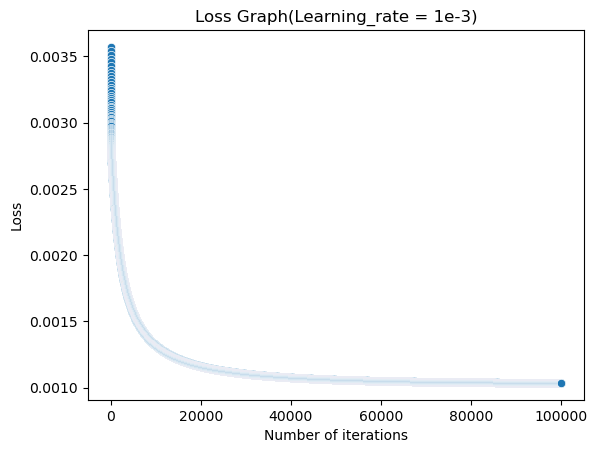

In [94]:
sns.scatterplot(y = loss, x = np.arange(1,100001))
plt.title('Loss Graph(Learning_rate = 1e-3)')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

In [95]:
import pickle

In [96]:
with open('chanduch_jdonepud _assignment1_part2.pickle', 'wb') as f:
    pickle.dump(lgr.weights, f)

In [51]:
lgr = LogitRegression(np.exp(-5), 10000)
lgr.fit(X_train, y_train)
y_pred_1 = lgr.predict(X_test)
y_pred_1 = y_pred_1.reshape(-1,1)
accuracy1 = ((y_pred_1 == y_test).sum())/len(y_pred_1)
print(accuracy1)
lgr.weights

0.8387096774193549


array([[-1.95603673],
       [ 0.87923754],
       [ 1.86337527],
       [ 0.47415297],
       [ 1.29577211],
       [ 0.03488878]])

Text(0, 0.5, 'Loss')

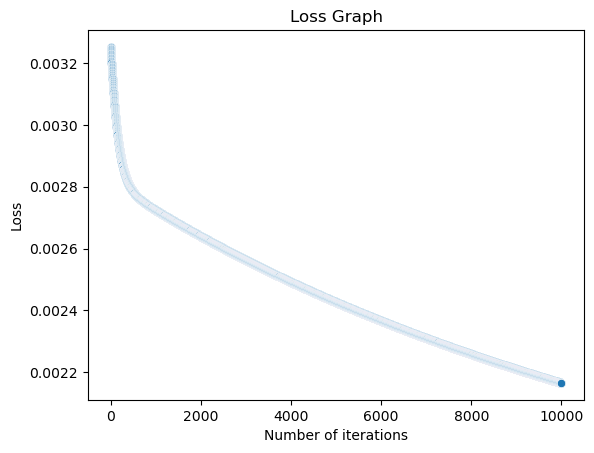

In [53]:
loss = lgr.loss
sns.scatterplot(y = loss, x = np.arange(1,10001))
plt.title('Loss Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')

In [77]:
lgr = LogitRegression(np.exp(-10), 10000)
lgr.fit(X_train, y_train)
y_pred_2 = lgr.predict(X_test)
y_pred_2 = y_pred_2.reshape(-1,1)
accuracy2 = ((y_pred_2 == y_test).sum())/len(y_pred_2)
print(accuracy2)
lgr.weights

0.532258064516129


array([[0.82729447],
       [0.43745749],
       [0.04005547],
       [0.90538512],
       [0.64292171],
       [0.09930681]])

Text(0, 0.5, 'Loss')

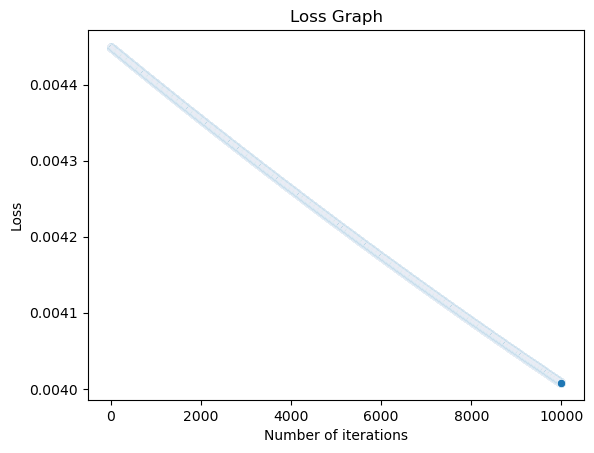

In [80]:
loss = lgr.loss
sns.scatterplot(y = loss, x = np.arange(1,10001))
plt.title('Loss Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')

In [90]:
lgr = LogitRegression(np.exp(-5), 1000)
lgr.fit(X_train, y_train)
y_pred_3 = lgr.predict(X_test)
y_pred_3 = y_pred_3.reshape(-1,1)
accuracy3 = ((y_pred_3 == y_test).sum())/len(y_pred_3)
print(accuracy3)
lgr.weights

0.6290322580645161


array([[-0.21486574],
       [ 0.59144128],
       [ 0.28119915],
       [ 0.18486849],
       [ 0.31128425],
       [-0.36452573]])

Text(0, 0.5, 'Loss')

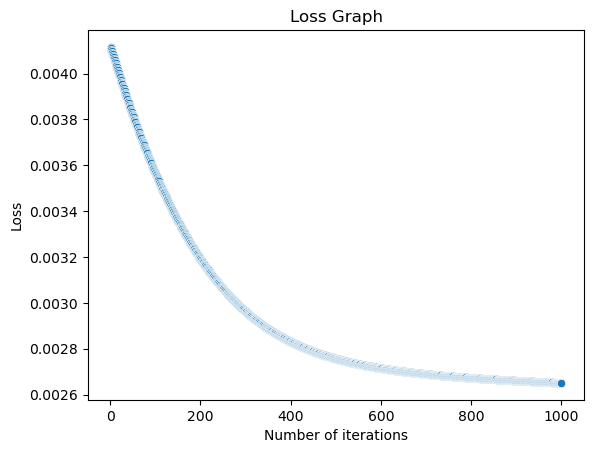

In [91]:
loss = lgr.loss
sns.scatterplot(y = loss, x = np.arange(1,1001))
plt.title('Loss Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')